<img src="./images/banner.png" width="800">

# Project 1: Predicting Tips Using Linear Regression

In this project, we'll apply the regression techniques we've learned to a real-world scenario: predicting tips in a restaurant setting. This practical application will help solidify our understanding of various regression methods and their implementation from scratch.


We'll be working with the 'tips' dataset, which is included in the seaborn library. This dataset contains information about tips given to waiters in a restaurant.


<img src="./images/tip.jpeg" width="400">

🔍 **Dataset Description:**
- The dataset contains 244 entries, each representing a meal at a restaurant.
- It includes information about the total bill, tip amount, and various factors that might influence tipping behavior.


Key features in the dataset include:
- `total_bill`: The total amount of the bill (in US dollars)
- `tip`: The amount of the tip (in US dollars)
- `sex`: The gender of the person paying the bill
- `smoker`: Whether the party included smokers (Yes/No)
- `day`: The day of the week
- `time`: Whether it was a dinner or lunch
- `size`: The number of people in the party


This dataset is particularly interesting because it allows us to explore both numerical and categorical predictors in our regression models. Our main goal is to predict the tip amount based on various factors. Throughout this project, we aim to:

1. Apply different regression techniques to a real dataset.
2. Compare the performance of various models we've implemented from scratch.
3. Gain insights into factors that influence tipping behavior.
4. Practice data preprocessing, feature engineering, and model evaluation.


**Key Learning Outcomes:**
- Implement and compare simple linear regression, multiple linear regression, and polynomial regression.
- Apply regularization techniques (Ridge and Lasso) to improve model performance.
- Evaluate models using various metrics and perform residual analysis.
- Interpret regression results in a real-world context.


Understanding tipping behavior can be valuable for several reasons:
- For restaurant owners, it can help in staff allocation and service improvement.
- For waitstaff, it provides insights into factors that might increase their tips.
- From a data science perspective, it's an excellent example of how regression analysis can be applied to real-world scenarios with mixed data types.


We'll follow a typical data science workflow:
1. Data exploration and preprocessing
2. Feature selection and engineering
3. Model implementation (starting with simple models and progressively adding complexity)
4. Model evaluation and comparison
5. Interpretation of results


By the end of this project, you'll have hands-on experience applying various regression techniques to a real dataset, reinforcing the concepts we've covered in previous lectures.


This project bridges the gap between theoretical knowledge and practical application, preparing you for more complex data science tasks in the future.


In the next section, we'll dive into exploring and preprocessing our dataset, laying the groundwork for our regression analyses.

**Table of contents**<a id='toc0_'></a>    
- [Data Exploration and Preprocessing](#toc1_)    
  - [Handling Missing Values](#toc1_1_)    
  - [Exploratory Data Analysis (EDA)](#toc1_2_)    
  - [Feature Encoding](#toc1_3_)    
  - [Feature Scaling](#toc1_4_)    
  - [Preparing for Modeling](#toc1_5_)    
- [Feature Selection and Engineering](#toc2_)    
  - [Correlation Analysis](#toc2_1_)    
  - [Visualizing Relationships](#toc2_2_)    
  - [Selecting Initial Features](#toc2_3_)    
  - [Feature Engineering](#toc2_4_)    
  - [Updating Selected Features](#toc2_5_)    
  - [Preparing Final Dataset for Modeling](#toc2_6_)    
- [Multiple Linear Regression](#toc3_)    
  - [Implementing Multiple Linear Regression](#toc3_1_)    
  - [Examining the Model](#toc3_2_)    
  - [Model Evaluation](#toc3_3_)    
  - [Visualizing Predictions](#toc3_4_)    
  - [Residual Analysis](#toc3_5_)    
  - [Interpreting the Results](#toc3_6_)    
- [Regularization Techniques](#toc4_)    
  - [Introduction to Regularization](#toc4_1_)    
  - [Implementing Ridge Regression](#toc4_2_)    
  - [Implementing Lasso Regression](#toc4_3_)    
  - [Comparing Models](#toc4_4_)    
  - [Visualizing Coefficient Changes](#toc4_5_)    
  - [Tuning Regularization Strength](#toc4_6_)    
  - [Interpreting the Results](#toc4_7_)    
- [Model Evaluation and Comparison](#toc5_)    
  - [Comparing All Models](#toc5_1_)    
  - [Visualizing Model Comparison](#toc5_2_)    
  - [Feature Importance](#toc5_3_)    
  - [Key Findings and Interpretation](#toc5_4_)    
  - [Limitations and Future Improvements](#toc5_5_)    
  - [Conclusion](#toc5_6_)    
- [Conclusion and Next Steps](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Data Exploration and Preprocessing](#toc0_)

In this section, we'll load the 'tips' dataset, explore its characteristics, and prepare it for our regression analyses.


First, let's load the necessary libraries and the dataset:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the tips dataset
tips_df = sns.load_dataset('tips')

In [3]:
# Display the first few rows and basic information
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


🔍 **Observation:** Take a moment to examine the output. Notice the data types of each column and check for any missing values.


### <a id='toc1_1_'></a>[Handling Missing Values](#toc0_)


Let's check for missing values:


In [5]:
tips_df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

💡 **Pro Tip:** If we find any missing values, we'll need to decide whether to impute them or drop the rows. In this case, the 'tips' dataset is typically clean, but it's always good practice to check.


### <a id='toc1_2_'></a>[Exploratory Data Analysis (EDA)](#toc0_)


Let's visualize some key aspects of our data:


Text(0.5, 1.0, 'Distribution of Tip Amounts')

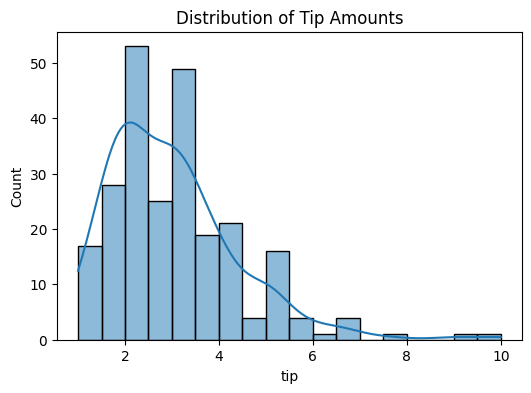

In [6]:
# Distribution of tip amounts
plt.figure(figsize=(6, 4))
sns.histplot(tips_df['tip'], kde=True)
plt.title('Distribution of Tip Amounts')

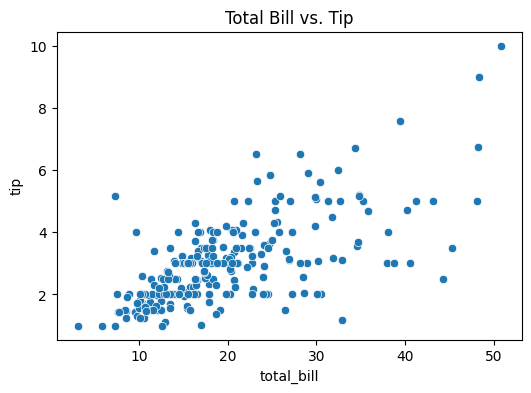

In [7]:
# Relationship between total bill and tip
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_bill', y='tip', data=tips_df)
plt.title('Total Bill vs. Tip')
plt.show()


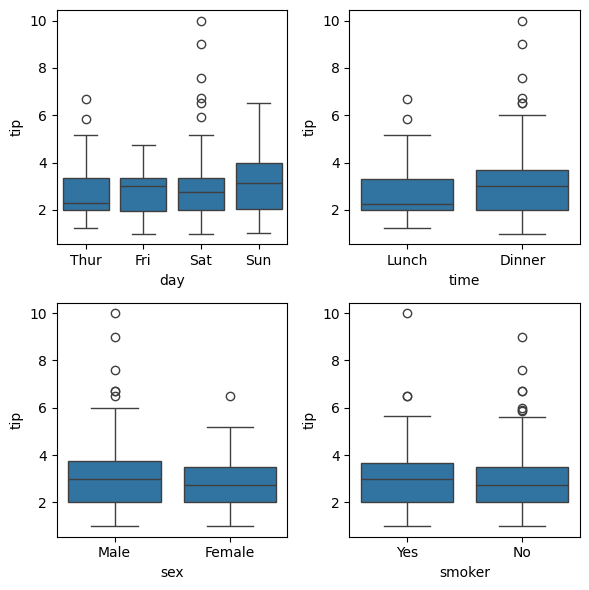

In [8]:
# Box plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
sns.boxplot(x='day', y='tip', data=tips_df, ax=axes[0, 0])
sns.boxplot(x='time', y='tip', data=tips_df, ax=axes[0, 1])
sns.boxplot(x='sex', y='tip', data=tips_df, ax=axes[1, 0])
sns.boxplot(x='smoker', y='tip', data=tips_df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

🔑 **Key Insights:** 
- Note the distribution of tips. Is it normally distributed?
- Observe the relationship between total bill and tip. Does it appear linear?
- Look for any patterns in tipping based on categorical variables.


### <a id='toc1_3_'></a>[Feature Encoding](#toc0_)


Now, let's encode our categorical variables:


In [9]:
# Categorical encoding for 'sex', 'smoker', and 'time'
tips_df['sex'] = tips_df['sex'].cat.codes
tips_df['smoker'] = tips_df['smoker'].cat.codes
tips_df['time'] = tips_df['time'].cat.codes

# One-hot encoding for 'day'
tips_df = pd.get_dummies(tips_df, columns=['day'], prefix='day')

tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,1,1,2,False,False,False,True
1,10.34,1.66,0,1,1,3,False,False,False,True
2,21.01,3.50,0,1,1,3,False,False,False,True
3,23.68,3.31,0,1,1,2,False,False,False,True
4,24.59,3.61,1,1,1,4,False,False,False,True


⚠️ **Important Note:** We're using categorical codes for 'sex', 'smoker', and 'time' because they're binary or have a natural order. For 'day', we use one-hot encoding to avoid implying an order among days.


### <a id='toc1_4_'></a>[Feature Scaling](#toc0_)


Feature scaling is crucial for many machine learning algorithms, including regression models. Let's scale our numerical features:


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['total_bill', 'size']
tips_df[numerical_features] = scaler.fit_transform(tips_df[numerical_features])

tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,-0.314711,1.01,1,1,1,-0.600193,False,False,False,True
1,-1.063235,1.66,0,1,1,0.453383,False,False,False,True
2,0.137780,3.50,0,1,1,0.453383,False,False,False,True
3,0.438315,3.31,0,1,1,-0.600193,False,False,False,True
4,0.540745,3.61,1,1,1,1.506958,False,False,False,True


🤔 **Why Feature Scaling Matters:**
1. **Convergence Speed:** Gradient descent converges much faster with scaled features.
2. **Feature Importance:** Scaling ensures that all features contribute equally to the model initially.
3. **Numerical Stability:** It helps prevent computational issues, especially in models sensitive to the scale of inputs.


💡 **Pro Tip:** We don't scale our target variable ('tip') as we want to interpret our predictions in the original scale.


### <a id='toc1_5_'></a>[Preparing for Modeling](#toc0_)


Finally, let's separate our features and target variable:


In [11]:
X = tips_df.drop('tip', axis=1)
y = tips_df['tip']

print("Features:", X.columns)

Features: Index(['total_bill', 'sex', 'smoker', 'time', 'size', 'day_Thur', 'day_Fri',
       'day_Sat', 'day_Sun'],
      dtype='object')


In [12]:
print("Target:", y.name)

Target: tip


By completing these preprocessing steps, we've prepared our data for various regression analyses. Our features are now encoded and scaled appropriately, setting the stage for effective model training and comparison.


🔑 **Key Takeaway:** Proper data exploration and preprocessing are crucial steps in any data science project. They help us understand our data better and prepare it in a way that allows our models to perform optimally.


In the next section, we'll move on to feature selection and engineering, where we'll decide which features to use in our initial models and consider creating new features that might improve our predictions.

## <a id='toc2_'></a>[Feature Selection and Engineering](#toc0_)

In this section, we'll focus on selecting the most relevant features for our tip prediction model and create new features that might enhance our model's performance, using techniques that align with our current knowledge.


### <a id='toc2_1_'></a>[Correlation Analysis](#toc0_)


Let's start by examining the correlations between our features and the target variable:


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Calculate correlations
corr_matrix = tips_df.corr()

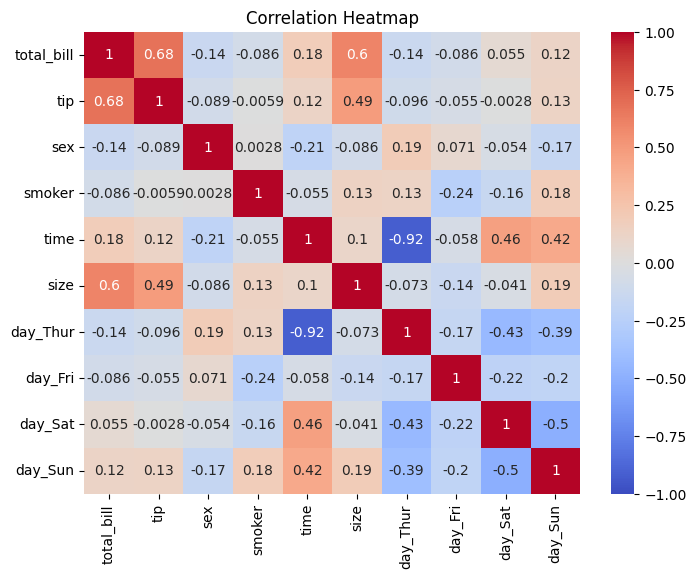

In [15]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Print correlations with 'tip'
corr_matrix['tip'].sort_values(ascending=False)

tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
time          0.121629
day_Sat      -0.002790
smoker       -0.005929
day_Fri      -0.055463
sex          -0.088862
day_Thur     -0.095879
Name: tip, dtype: float64

🔑 **Key Insight:** Pay attention to which features have the strongest correlations with the 'tip' amount. This will guide our initial feature selection.


### <a id='toc2_2_'></a>[Visualizing Relationships](#toc0_)


Let's create scatter plots to visualize the relationship between numerical features and the tip amount:


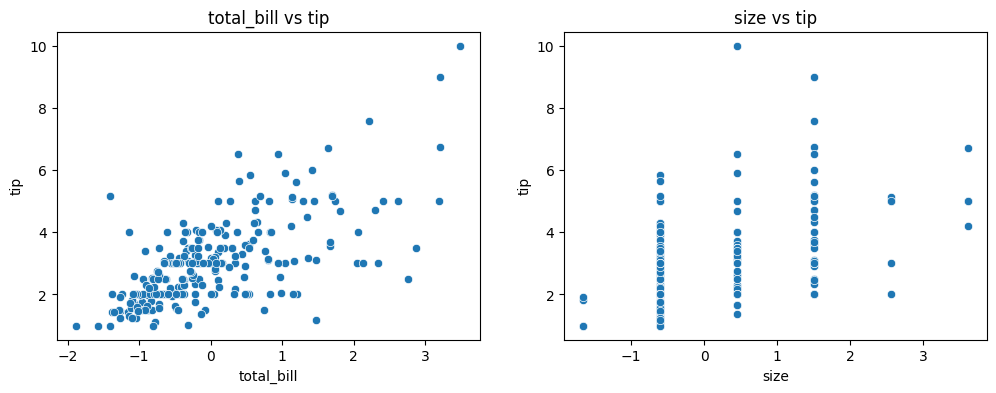

In [17]:
numerical_features = ['total_bill', 'size']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=feature, y='tip', data=tips_df, ax=axes[i])
    axes[i].set_title(f'{feature} vs tip')

These visualizations can help us identify which features seem to have a strong relationship with the tip amount.


### <a id='toc2_3_'></a>[Selecting Initial Features](#toc0_)


Based on our correlation analysis and visualizations, let's select our initial set of features:


In [18]:
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun']
X_selected = tips_df[selected_features]

print("Selected features:", X_selected.columns)

Selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun'], dtype='object')


We're starting with a subset of features. We can always add or remove features later based on model performance.


### <a id='toc2_4_'></a>[Feature Engineering](#toc0_)


Now, let's create some new features that might improve our model:


1. **Tip Percentage:**

In [19]:
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill'] * 100
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage
0,-0.314711,1.01,1,1,1,-0.600193,False,False,False,True,-320.929049
1,-1.063235,1.66,0,1,1,0.453383,False,False,False,True,-156.127245
2,0.137780,3.50,0,1,1,0.453383,False,False,False,True,2540.283454
3,0.438315,3.31,0,1,1,-0.600193,False,False,False,True,755.164487
4,0.540745,3.61,1,1,1,1.506958,False,False,False,True,667.597846
...,...,...,...,...,...,...,...,...,...,...,...
239,1.040511,5.92,0,1,1,0.453383,False,False,True,False,568.951157
240,0.832275,2.00,1,0,1,-0.600193,False,False,True,False,240.305157
241,0.324630,2.00,0,0,1,-0.600193,False,False,True,False,616.086951
242,-0.221287,1.75,0,1,1,-0.600193,False,False,True,False,-790.829973


2. **Per Person Total:**

In [20]:
tips_df['per_person_total'] = tips_df['total_bill'] / tips_df['size']
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total
0,-0.314711,1.01,1,1,1,-0.600193,False,False,False,True,-320.929049,0.524350
1,-1.063235,1.66,0,1,1,0.453383,False,False,False,True,-156.127245,-2.345115
2,0.137780,3.50,0,1,1,0.453383,False,False,False,True,2540.283454,0.303893
3,0.438315,3.31,0,1,1,-0.600193,False,False,False,True,755.164487,-0.730291
4,0.540745,3.61,1,1,1,1.506958,False,False,False,True,667.597846,0.358832
...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.040511,5.92,0,1,1,0.453383,False,False,True,False,568.951157,2.294994
240,0.832275,2.00,1,0,1,-0.600193,False,False,True,False,240.305157,-1.386680
241,0.324630,2.00,0,0,1,-0.600193,False,False,True,False,616.086951,-0.540876
242,-0.221287,1.75,0,1,1,-0.600193,False,False,True,False,-790.829973,0.368692


3. **Is Weekend:**

In [21]:
tips_df['is_weekend'] = tips_df['day_Sat'] | tips_df['day_Sun']
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend
0,-0.314711,1.01,1,1,1,-0.600193,False,False,False,True,-320.929049,0.524350,True
1,-1.063235,1.66,0,1,1,0.453383,False,False,False,True,-156.127245,-2.345115,True
2,0.137780,3.50,0,1,1,0.453383,False,False,False,True,2540.283454,0.303893,True
3,0.438315,3.31,0,1,1,-0.600193,False,False,False,True,755.164487,-0.730291,True
4,0.540745,3.61,1,1,1,1.506958,False,False,False,True,667.597846,0.358832,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.040511,5.92,0,1,1,0.453383,False,False,True,False,568.951157,2.294994,True
240,0.832275,2.00,1,0,1,-0.600193,False,False,True,False,240.305157,-1.386680,True
241,0.324630,2.00,0,0,1,-0.600193,False,False,True,False,616.086951,-0.540876,True
242,-0.221287,1.75,0,1,1,-0.600193,False,False,True,False,-790.829973,0.368692,True


4. **Party Size Category:**

In [22]:
tips_df['party_size_category'] = pd.cut(tips_df['size'], bins=[0, 3, 6, np.inf], labels=['Small', 'Medium', 'Large'])
tips_df = pd.get_dummies(tips_df, columns=['party_size_category'], prefix='party')
tips_df

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,-0.314711,1.01,1,1,1,-0.600193,False,False,False,True,-320.929049,0.524350,True,False,False,False
1,-1.063235,1.66,0,1,1,0.453383,False,False,False,True,-156.127245,-2.345115,True,True,False,False
2,0.137780,3.50,0,1,1,0.453383,False,False,False,True,2540.283454,0.303893,True,True,False,False
3,0.438315,3.31,0,1,1,-0.600193,False,False,False,True,755.164487,-0.730291,True,False,False,False
4,0.540745,3.61,1,1,1,1.506958,False,False,False,True,667.597846,0.358832,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.040511,5.92,0,1,1,0.453383,False,False,True,False,568.951157,2.294994,True,True,False,False
240,0.832275,2.00,1,0,1,-0.600193,False,False,True,False,240.305157,-1.386680,True,False,False,False
241,0.324630,2.00,0,0,1,-0.600193,False,False,True,False,616.086951,-0.540876,True,False,False,False
242,-0.221287,1.75,0,1,1,-0.600193,False,False,True,False,-790.829973,0.368692,True,False,False,False


Let's examine our new features:


In [23]:
tips_df.filter(like='party_').columns

Index(['party_Small', 'party_Medium', 'party_Large'], dtype='object')

In [24]:
party_size_columns = tips_df.filter(like='party_').columns.tolist()
tips_df[['tip', 'tip_percentage', 'per_person_total', 'is_weekend'] + party_size_columns].head()

,tip,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,1.01,-320.929049,0.524350,True,False,False,False
1,1.66,-156.127245,-2.345115,True,True,False,False
2,3.50,2540.283454,0.303893,True,True,False,False
3,3.31,755.164487,-0.730291,True,False,False,False
4,3.61,667.597846,0.358832,True,True,False,False


🔑 **Key Concept:** Feature engineering allows us to incorporate domain knowledge and create new features that might capture important patterns in the data.


### <a id='toc2_5_'></a>[Updating Selected Features](#toc0_)


Now, let's update our selected features to include some of our engineered features:


In [25]:
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage', 'per_person_total', 'is_weekend'] + [col for col in tips_df.columns if col.startswith('party_')]
X_selected = tips_df[selected_features]

print("Updated selected features:", X_selected.columns)

Updated selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage',
       'per_person_total', 'is_weekend', 'party_Small', 'party_Medium',
       'party_Large'],
      dtype='object')


### <a id='toc2_6_'></a>[Preparing Final Dataset for Modeling](#toc0_)


Finally, let's prepare our final dataset for modeling:


In [26]:
from sklearn.model_selection import train_test_split

X = X_selected.astype(np.float64)
y = tips_df['tip'].astype(np.float64)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (195, 11)
Testing set shape: (49, 11)


In [27]:
assert X_train.shape[0] + X_test.shape[0] == tips_df.shape[0], "Training and testing sets do not match the original dataset size"
assert X_train.shape[1] == X_test.shape[1], "Training and testing sets do not have the same number of features"

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def add_bias_column(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

# Add a column of ones to X for the intercept term
X_train = add_bias_column(X_train)
X_test = add_bias_column(X_test)

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

🤔 **Why This Matters:** Proper feature selection and engineering can significantly impact model performance. By carefully choosing and creating features, we're setting our models up for success.


In the next section, we'll start implementing our regression models, beginning with simple linear regression and progressively moving to more complex models. We'll use the features we've selected and engineered to predict tip amounts, and we'll evaluate how these choices impact our model's performance.

## <a id='toc3_'></a>[Multiple Linear Regression](#toc0_)

In this section, we'll implement multiple linear regression to predict tip amounts using multiple features. We'll use sklearn for simplicity and focus on understanding the process and interpreting the results.


### <a id='toc3_1_'></a>[Implementing Multiple Linear Regression](#toc0_)


Let's start by importing the necessary modules and fitting our model:


In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

LinearRegression()

🔑 **Key Concept:** Multiple linear regression allows us to use multiple features to predict our target variable, potentially capturing more complex relationships in the data.


### <a id='toc3_2_'></a>[Examining the Model](#toc0_)


Let's look at the coefficients and intercept of our model:


In [30]:
# Print the intercept and coefficients
print("Intercept:", lr_model.intercept_)
print("\nCoefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature}: {coef}")

Intercept: [2.93507753]

Coefficients:
total_bill: [ 0.00000000e+00  8.09990035e-01  1.86667046e-01  9.87996594e-02
 -1.36747230e-01  9.86508735e-02  1.00673066e-05  8.70911975e-02
 -3.80963561e-02  4.58998054e-02  6.90673614e-01  0.00000000e+00]


💡 **Pro Tip:** The coefficients represent the change in the target variable for a one-unit change in the corresponding feature, holding all other features constant.


### <a id='toc3_3_'></a>[Model Evaluation](#toc0_)


Now, let's evaluate our model using the helper function provided:


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training set performance
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Test set performance
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    print("Training Set Results:")
    print(f"Mean Squared Error: {mse_train}")
    print(f"R-squared: {r2_train}")
    print(f"Root Mean Squared Error: {rmse_train}")
    print("\nTest Set Results:")
    print(f"Mean Squared Error: {mse_test}")
    print(f"R-squared: {r2_test}")
    print(f"Root Mean Squared Error: {rmse_test}")
    return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test

# Evaluate the model
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

Training Set Results:
Mean Squared Error: 1.0733071862533476
R-squared: 0.4717215862741928
Root Mean Squared Error: 1.0360053987568538

Test Set Results:
Mean Squared Error: 0.7056630914860881
R-squared: 0.4354565853410992
Root Mean Squared Error: 0.840037553616556


🤔 **Why This Matters:** Comparing performance on training and test sets helps us detect overfitting. If the model performs much better on the training set than on the test set, it might be overfitting.


### <a id='toc3_4_'></a>[Visualizing Predictions](#toc0_)


Let's create a scatter plot to visualize our predicted vs actual tips for the test set:


Text(0.5, 1.0, 'Actual vs Predicted Tips (Test Set)')

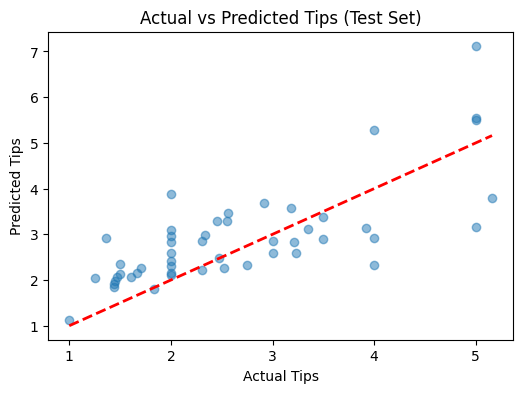

In [32]:
import matplotlib.pyplot as plt

y_test_pred = lr_model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Actual vs Predicted Tips (Test Set)")

⚠️ **Important Note:** Points closer to the red line indicate better predictions. Deviations from this line show where our model's predictions are off.


### <a id='toc3_5_'></a>[Residual Analysis](#toc0_)


Finally, let's perform a residual analysis to check for any patterns in our errors:


Text(0.5, 1.0, 'Residual Plot (Test Set)')

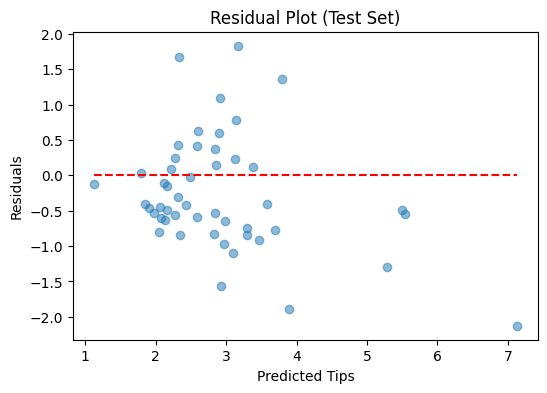

In [33]:
residuals = y_test - y_test_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='r', linestyles='--')
plt.xlabel("Predicted Tips")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")


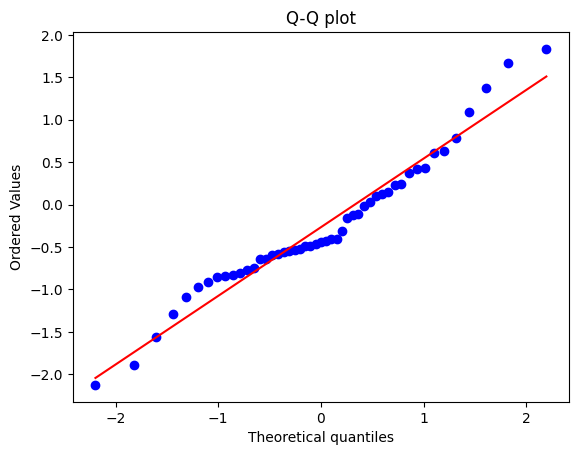

In [34]:
import scipy.stats as stats

fig, ax = plt.subplots()
stats.probplot((y_test - y_test_pred).reshape(-1), plot=ax, fit=True, dist='norm')
ax.set_title("Q-Q plot")
plt.show()

🔑 **Key Insight:** In an ideal scenario, residuals should be randomly scattered around the horizontal line at y=0. Any visible patterns might indicate that our model is missing some important aspect of the data.


### <a id='toc3_6_'></a>[Interpreting the Results](#toc0_)


Now that we've built and evaluated our multiple linear regression model, let's interpret our results:


1. **Model Performance**: Compare the R-squared values for the training and test sets. How much of the variance in tips can our model explain? Is there a significant difference between training and test performance?

2. **Overfitting Check**: Look at the difference between training and test RMSE. A large difference might indicate overfitting.

3. **Feature Importance**: Examine the coefficients. Which features seem to have the largest impact on tip amounts?

4. **Prediction Accuracy**: Consider the RMSE on the test set. On average, how far off are our predictions in dollar terms?

5. **Residual Analysis**: Are there any patterns in the residual plot that might suggest our model is missing something?


💡 **Pro Tip:** Remember that while our model can show relationships between features and tips, it doesn't necessarily imply causation. Other factors not included in our dataset might also influence tipping behavior.


By implementing multiple linear regression and carefully evaluating its performance on both training and test sets, we've created a more comprehensive model for predicting tips. In the next sections, we'll explore how we can potentially improve our predictions using more advanced techniques like polynomial regression and regularization.

## <a id='toc4_'></a>[Regularization Techniques](#toc0_)

In this section, we'll explore regularization techniques to potentially improve our multiple linear regression model. We'll focus on Ridge and Lasso regression, which can help prevent overfitting and handle multicollinearity.


### <a id='toc4_1_'></a>[Introduction to Regularization](#toc0_)


Regularization adds a penalty term to the loss function, discouraging overly complex models. This can lead to better generalization on unseen data.


🔑 **Key Concept:** Regularization helps to prevent overfitting by adding a penalty for large coefficients.


### <a id='toc4_2_'></a>[Implementing Ridge Regression](#toc0_)


Ridge regression (L2 regularization) adds a penalty term proportional to the square of the magnitude of coefficients.


In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [36]:
# Initialize Ridge model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength

In [37]:
# Fit the model
ridge_model.fit(X_train, y_train)

Ridge()

In [38]:
# Evaluate the model
print("Ridge Regression Results:")
evaluate_model(ridge_model, X_train, y_train, X_test, y_test)

Ridge Regression Results:
Training Set Results:
Mean Squared Error: 1.0738869295682891
R-squared: 0.47143623844208293
Root Mean Squared Error: 1.0362851584232446

Test Set Results:
Mean Squared Error: 0.6979894958305285
R-squared: 0.4415956025950386
Root Mean Squared Error: 0.8354576565155941


(1.0738869295682891,
 1.0362851584232446,
 0.47143623844208293,
 0.6979894958305285,
 0.8354576565155941,
 0.4415956025950386)

In [39]:
# Print coefficients
print("\nRidge Coefficients:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"{feature}: {coef}")


Ridge Coefficients:
total_bill: [ 0.00000000e+00  8.03866498e-01  2.35910091e-01  7.98170518e-02
 -1.27591345e-01  9.66005316e-02  1.00977385e-05  8.70317092e-02
 -3.09908132e-02 -3.04338999e-02  3.62564763e-01  0.00000000e+00]


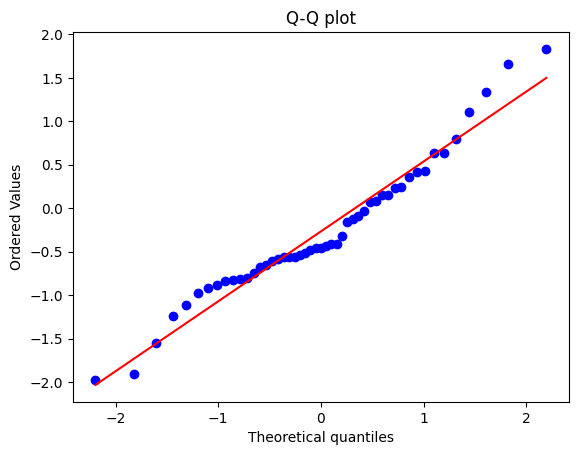

In [40]:
import scipy.stats as stats

y_test_pred = ridge_model.predict(X_test)
fig, ax = plt.subplots()
stats.probplot((y_test - y_test_pred).reshape(-1), plot=ax, fit=True, dist='norm')
ax.set_title("Q-Q plot")
plt.show()

### <a id='toc4_3_'></a>[Implementing Lasso Regression](#toc0_)


Lasso regression (L1 regularization) adds a penalty term proportional to the absolute value of the magnitude of coefficients. This can lead to sparse models by driving some coefficients to exactly zero.


In [41]:
from sklearn.linear_model import Lasso

# Initialize Lasso model
lasso_model = Lasso(alpha=0.01)  # alpha is the regularization strength

# Fit the model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [42]:
# Evaluate the model
print("\nLasso Regression Results:")
evaluate_model(lasso_model, X_train, y_train, X_test, y_test)


Lasso Regression Results:
Training Set Results:
Mean Squared Error: 1.0782417412253322
R-squared: 0.4692928138720043
Root Mean Squared Error: 1.038384197311059

Test Set Results:
Mean Squared Error: 0.673477608780043
R-squared: 0.4612055617698514
Root Mean Squared Error: 0.8206568154716337


(1.0782417412253322,
 1.038384197311059,
 0.4692928138720043,
 0.673477608780043,
 0.8206568154716337,
 0.4612055617698514)

In [43]:
# Print non-zero coefficients
print("\nLasso Coefficients (non-zero):")
for feature, coef in zip(X.columns, lasso_model.coef_):
    if coef != 0:
        print(f"{feature}: {coef}")


Lasso Coefficients (non-zero):
size: 0.795853926233342
time: 0.24669977892247785
day_Sun: -0.08989511066572839
tip_percentage: 0.06745546358919115
per_person_total: 9.975494783280697e-06
is_weekend: 0.0763961034093149


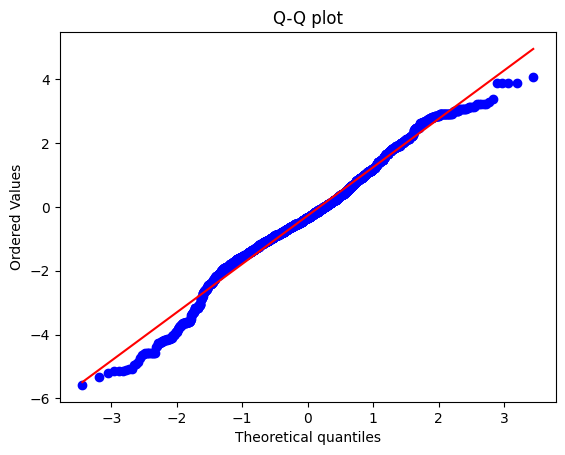

In [44]:
import scipy.stats as stats

y_test_pred = lasso_model.predict(X_test)
fig, ax = plt.subplots()
stats.probplot((y_test - y_test_pred).reshape(-1), plot=ax, fit=True, dist='norm')
ax.set_title("Q-Q plot")
plt.show()

### <a id='toc4_4_'></a>[Comparing Models](#toc0_)


Let's compare the performance of our original linear regression model with the regularized models:


```python
models = {
    "Linear Regression": model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model
}

for name, model in models.items():
    print(f"\n{name} Results:")
    evaluate_model(model, X_train, y_train, X_test, y_test)
```


### <a id='toc4_5_'></a>[Visualizing Coefficient Changes](#toc0_)


To understand how regularization affects our model, let's visualize how the coefficients change across different models:


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Bias'),
  Text(1, 0, 'total_bill'),
  Text(2, 0, 'size'),
  Text(3, 0, 'time'),
  Text(4, 0, 'day_Sat'),
  Text(5, 0, 'day_Sun'),
  Text(6, 0, 'tip_percentage'),
  Text(7, 0, 'per_person_total'),
  Text(8, 0, 'is_weekend'),
  Text(9, 0, 'party_Small'),
  Text(10, 0, 'party_Medium'),
  Text(11, 0, 'party_Large')])

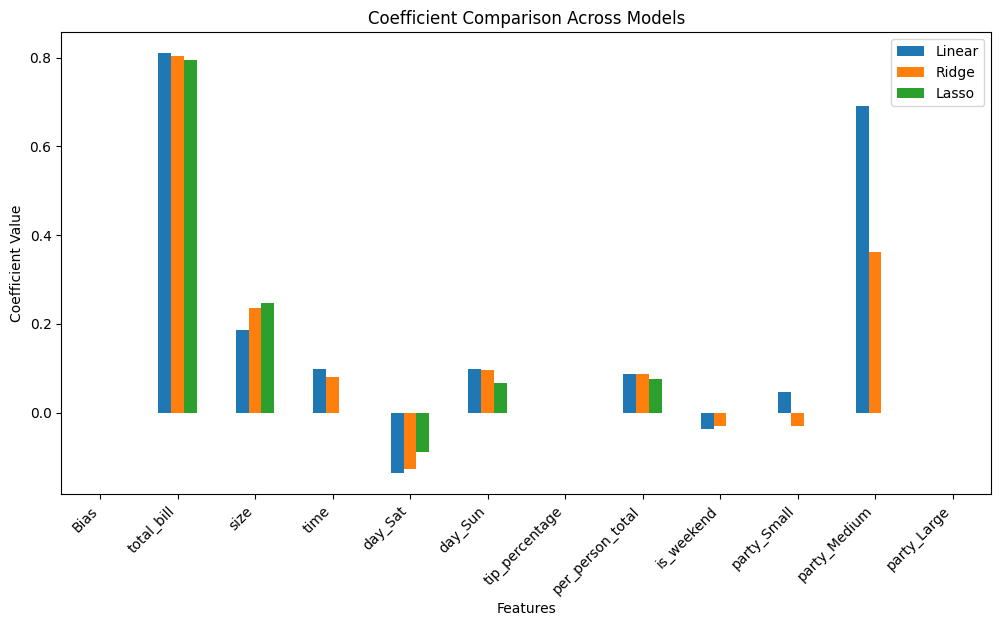

In [45]:
import matplotlib.pyplot as plt

coef_df = pd.DataFrame({
    'Linear': lr_model.coef_.flatten(),
    'Ridge': ridge_model.coef_.flatten(),
    'Lasso': lasso_model.coef_.flatten()
}, index=['Bias'] + list(X.columns))

coef_df.plot(kind='bar', figsize=(12, 6))
plt.title('Coefficient Comparison Across Models')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(loc='best')
plt.xticks(rotation=45, ha='right')

🔍 **Example:** Notice how some coefficients might be reduced or even eliminated in the regularized models.


### <a id='toc4_6_'></a>[Tuning Regularization Strength](#toc0_)


The `alpha` parameter controls the strength of regularization. Let's use cross-validation to find the best alpha for Ridge regression:


In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best negative MSE:", -grid_search.best_score_)

# Use the best model for final evaluation
best_ridge_model = grid_search.best_estimator_
print("\nBest Ridge Model Results:")
evaluate_model(best_ridge_model, X_train, y_train, X_test, y_test)

Best parameters: {'alpha': 10}
Best negative MSE: 1.270834688134846

Best Ridge Model Results:
Training Set Results:
Mean Squared Error: 1.0777405447217692
R-squared: 0.4695395012111542
Root Mean Squared Error: 1.0381428344509098

Test Set Results:
Mean Squared Error: 0.6824581987860445
R-squared: 0.45402092506600644
Root Mean Squared Error: 0.8261102824599417


(1.0777405447217692,
 1.0381428344509098,
 0.4695395012111542,
 0.6824581987860445,
 0.8261102824599417,
 0.45402092506600644)

💡 **Pro Tip:** You can perform a similar grid search for Lasso regression to find its optimal alpha value.


### <a id='toc4_7_'></a>[Interpreting the Results](#toc0_)


1. **Model Comparison**: How do the regularized models perform compared to the original linear regression? Look at both training and test set performance.

2. **Coefficient Changes**: Observe how coefficients change across models. Which features are most affected by regularization?

3. **Feature Selection**: In Lasso regression, some coefficients may be exactly zero. Which features were eliminated?

4. **Generalization**: Do the regularized models show improved performance on the test set? This could indicate better generalization.

5. **Best Alpha**: What does the best alpha value for Ridge regression tell us about the level of regularization needed?

> **Important Note:** While regularization can improve model performance and generalization, it's not always necessary. If your original linear regression model isn't overfitting, regularization might not provide significant benefits.


By applying regularization techniques, we've explored ways to potentially improve our model's performance and generalization. These methods are particularly useful when dealing with many features or when there's a risk of overfitting.


In the next section, we'll summarize our findings and discuss the implications of our various models for predicting tips in this restaurant scenario.

## <a id='toc5_'></a>[Model Evaluation and Comparison](#toc0_)

In this final section, we'll comprehensively evaluate and compare all the models we've built throughout this project. We'll synthesize our findings, draw conclusions, and discuss the implications of our results.


### <a id='toc5_1_'></a>[Comparing All Models](#toc0_)


Let's start by comparing the performance of all our models side by side:


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

models = {
    "Multiple Linear Regression": lr_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model
}

results = []

for name, model in models.items():
    mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({
        "Model": name,
        "Train MSE": mse_train,
        "Train R2": r2_train,
        "Test MSE": mse_test,
        "Test R2": r2_test,
        "Train RMSE": np.sqrt(mse_train),
        "Test RMSE": np.sqrt(mse_test)
    })

results_df = pd.DataFrame(results)
print(results_df)

Training Set Results:
Mean Squared Error: 1.0733071862533476
R-squared: 0.4717215862741928
Root Mean Squared Error: 1.0360053987568538

Test Set Results:
Mean Squared Error: 0.7056630914860881
R-squared: 0.4354565853410992
Root Mean Squared Error: 0.840037553616556
Training Set Results:
Mean Squared Error: 1.0738869295682891
R-squared: 0.47143623844208293
Root Mean Squared Error: 1.0362851584232446

Test Set Results:
Mean Squared Error: 0.6979894958305285
R-squared: 0.4415956025950386
Root Mean Squared Error: 0.8354576565155941
Training Set Results:
Mean Squared Error: 1.0782417412253322
R-squared: 0.4692928138720043
Root Mean Squared Error: 1.038384197311059

Test Set Results:
Mean Squared Error: 0.673477608780043
R-squared: 0.4612055617698514
Root Mean Squared Error: 0.8206568154716337
                        Model  Train MSE  Train R2  Test MSE   Test R2  \
0  Multiple Linear Regression   1.073307  0.471722  0.705663  0.435457   
1            Ridge Regression   1.073887  0.471436  0

### <a id='toc5_2_'></a>[Visualizing Model Comparison](#toc0_)


Let's create a bar plot to visually compare the performance of our models:


([0, 1, 2],
 [Text(0, 0, 'Multiple Linear Regression'),
  Text(1, 0, 'Ridge Regression'),
  Text(2, 0, 'Lasso Regression')])

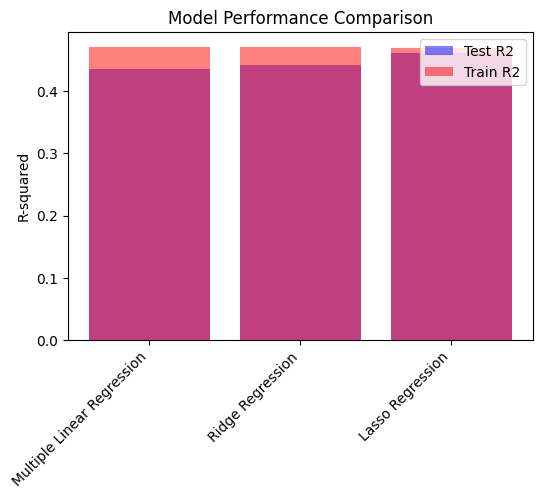

In [55]:
plt.figure(figsize=(6, 4))
plt.bar(results_df['Model'], results_df['Test R2'], alpha=0.5, label='Test R2', color='blue')
plt.bar(results_df['Model'], results_df['Train R2'], alpha=0.5, label='Train R2', color='red')
plt.ylabel('R-squared')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(rotation=45, ha='right')

🔍 **Example:** This visualization helps us quickly identify which models are performing best and if there are significant differences between training and test performance.


### <a id='toc5_3_'></a>[Feature Importance](#toc0_)


For our best model, let's examine the feature importances (if applicable):


In [65]:
coef.shape

(1, 12)

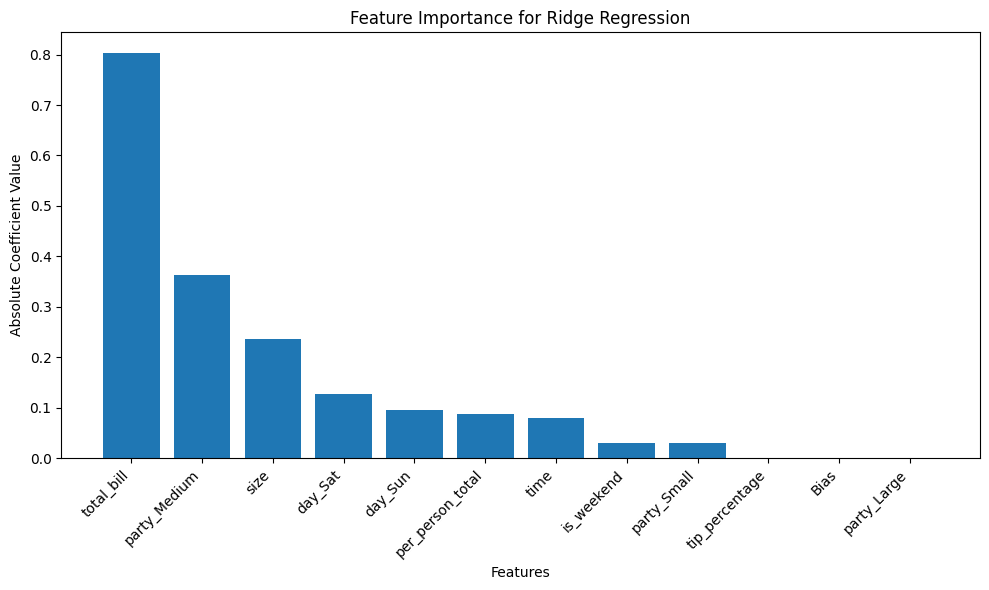

In [67]:
best_model = ridge_model
best_model_name = "Ridge Regression"

if hasattr(best_model, 'coef_'):
    coef = best_model.coef_
    feature_importance = pd.DataFrame({'feature': ['Bias'] + list(X.columns), 'importance': np.abs(coef.flatten())})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title(f'Feature Importance for {best_model_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### <a id='toc5_4_'></a>[Key Findings and Interpretation](#toc0_)


1. **Best Performing Model**: Which model performed best on the test set? Why do you think this model outperformed the others?

2. **Overfitting vs. Underfitting**: Compare the training and test performance. Do any models show signs of overfitting or underfitting?

3. **Feature Importance**: What are the most important features for predicting tip amounts? Do these align with our initial expectations?

4. **Residual Analysis**: Does the residual plot for our best model show any patterns? What does this tell us about our model's assumptions?

5. **Practical Significance**: How well does our best model predict tip amounts in dollar terms? Is this accuracy sufficient for practical use?


🤔 **Why This Matters**: Understanding which model performs best and why helps us make informed decisions about which approach to use in similar future projects.


### <a id='toc5_5_'></a>[Limitations and Future Improvements](#toc0_)


- **Data Limitations**: Discuss any limitations in our dataset. Are there any important features we might be missing?
- **Model Assumptions**: Have we violated any assumptions of linear regression? How might this affect our results?
- **Advanced Techniques**: Suggest any advanced techniques (e.g., ensemble methods, non-linear models) that might improve performance.


### <a id='toc5_6_'></a>[Conclusion](#toc0_)


Summarize the key findings of our project:
- Which model would you recommend for predicting tips in this restaurant scenario?
- What insights have we gained about factors influencing tip amounts?
- How could the restaurant potentially use this model to improve their business?


💡 **Pro Tip**: Remember that while our model can predict tips with some accuracy, many factors influencing tipping behavior may not be captured in our dataset. Always interpret results in the context of real-world complexity.


By completing this comprehensive evaluation, we've not only built and compared various regression models but also gained valuable insights into the factors influencing tipping behavior in this restaurant scenario. This process demonstrates the power of data analysis in uncovering patterns and making predictions in real-world situations.

## <a id='toc6_'></a>[Conclusion and Next Steps](#toc0_)

In this final section, we'll summarize our key findings, discuss the implications of our results, and explore potential next steps for further analysis and improvement:

1. **Model Performance**:
   - Briefly recap which model performed best (e.g., "Our Ridge Regression model outperformed other models with a test R-squared of 0.45").
   - Highlight the improvement over the baseline simple linear regression model.

2. **Important Features**:
   - List the top 3-5 features that were most influential in predicting tip amounts.
   - Example: "Total bill amount, party size, and whether it was a weekend were the strongest predictors of tip amount."

3. **Model Insights**:
   - Summarize any interesting relationships uncovered by the model.
   - For instance: "We found that larger parties tend to leave slightly smaller tips as a percentage of the total bill."

4. **Practical Significance**:
   - Discuss the practical implications of our model's accuracy.
   - Example: "Our best model predicts tip amounts with an average error of $1.20, which could be useful for waitstaff to estimate their earnings."


🔑 **Key Takeaway:** Our analysis has provided valuable insights into tipping behavior, allowing for more accurate predictions of tip amounts based on various factors.


It's important to acknowledge the limitations of our study:

1. **Data Limitations**:
   - Our dataset is from a single restaurant and may not be representative of all dining establishments.
   - We lack information on factors like service quality or food satisfaction.

2. **Model Assumptions**:
   - Linear regression assumes a linear relationship between features and the target variable, which may not always hold true for tipping behavior.

3. **External Factors**:
   - Tipping can be influenced by cultural norms, personal preferences, and other factors not captured in our dataset.


> **Important Note:** While our model provides useful insights, it should be used as a guide rather than a definitive predictor of tipping behavior.


Our findings could be applied in several ways:

1. **Restaurant Management**:
   - Use the model to forecast staff earnings and optimize scheduling.
   - Identify factors that lead to higher tips and potentially improve those aspects of service.

2. **Waitstaff Insights**:
   - Provide staff with data-driven insights on what factors tend to influence tipping.

3. **Customer Experience**:
   - Use insights to enhance overall customer experience, potentially leading to better tips and customer satisfaction.


To build upon this project, consider the following next steps:

1. **Feature Engineering**:
   - Create more complex features, such as interaction terms between existing features.
   - Example: "We could explore the interaction between party size and total bill amount."

2. **Advanced Models**:
   - Experiment with more advanced machine learning models like Random Forests or Gradient Boosting Machines.
   - Try ensemble methods to combine predictions from multiple models.

3. **Collect More Data**:
   - Gather data from multiple restaurants to improve generalizability.
   - Include additional features like service quality ratings or food satisfaction scores.

4. **Time Series Analysis**:
   - If data is available, analyze how tipping patterns change over time (e.g., seasonality, day of the week trends).

5. **Cross-Validation**:
   - Implement k-fold cross-validation for more robust model evaluation.

6. **Hyperparameter Tuning**:
   - Perform more extensive hyperparameter tuning using techniques like Random Search or Bayesian Optimization.

7. **Explainable AI Techniques**:
   - Apply techniques like SHAP (SHapley Additive exPlanations) values to get more detailed insights into feature importance and their impact on individual predictions.


💡 **Note:** Consider presenting your findings to stakeholders (e.g., restaurant management) and gather their feedback. Their domain expertise could provide valuable insights for further analysis.


This project has demonstrated the power of data analysis and machine learning in understanding and predicting real-world behaviors like tipping. While our model provides valuable insights, it's crucial to remember that human behavior is complex and not always predictable.


The skills and approach you've used in this project – from data preprocessing and feature engineering to model selection and evaluation – are transferable to many other data science problems. Continue to practice and build upon these skills as you tackle more complex projects in the future.


By completing this project, you've gained hands-on experience with the entire data science workflow, from data exploration to model deployment and interpretation. As you move forward, keep exploring new datasets, trying different techniques, and always strive to translate your findings into actionable insights.